<a href="https://colab.research.google.com/github/T-Dayaram/Python_Projects_DATA201/blob/main/TDayaram_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Troy's project for LaGuardia College Data Analytics course
#Objective; Analyze student test performance
# 1. Pick a school in the dataset as our initial point (our control)
# 2. Pick a feature/measure/score
# 3. compare at least one school to another school (individual or district or even borough)
# copy the following https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv
# 4. include descriptive statistics, at least one cleaning tast and one visualization
# 5. Sum it up at the end briefly

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv")

schools = pd.DataFrame(df)
schools.info()
#Here's an overview of the data we will be looking at

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Mean Score                   212331 non-null  object
 7   Number Scoring Below 65      212331 non-null  object
 8   Percent Scoring Below 65     212331 non-null  object
 9   Number Scoring 65 or Above   212331 non-null  object
 10  Percent Scoring 65 or Above  212331 non-null  object
 11  Number Scoring 80 or Above   212331 non-null  object
 12  Percent Scoring 80 or Above  212331 non-null  object
 13  Number Scoring

In [ ]:
#Using the first ten rows, let's see what the table looks like
schools.head(10)
#We have the column "school name" so we can build off of that

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na
5,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,67.4,3,33.3,6,66.7,0,0,na,na
6,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2016,15,72.6,2,13.3,13,86.7,5,33.3,na,na
7,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2017,9,64.4,5,55.6,4,44.4,1,11.1,na,na
8,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4,1,2,48,98,23,46.9,48,98
9,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79,9,17.6,42,82.4,33,64.7,40,78.4


In [ ]:
#Which schools are we able to choose from?
#There are a lot of schools so in order to list all of them, we need a 'for' loop
for school in schools['School Name'].unique():
    print(school)

P.S. 034 Franklin D. Roosevelt
P.S. 140 Nathan Straus
P.S. 184m Shuang Wen
P.S. 188 The Island School
Orchard Collegiate Academy
Technology, Arts, and Sciences Studio
University Neighborhood Middle School
Collaborative Academy of Science, Technology, & La
School for Global Leaders
University Neighborhood High School
East Side Community School
Forsyth Satellite Academy
Marta Valle High School
Lower East Side Preparatory High School
New Explorations into Science, Technology and Math
Cascades High School
Bard High School Early College
Tompkins Square Middle School
47 The American Sign Language and English Secondar
J.H.S. 104 Simon Baruch
P.S. 111 Adolph S. Ochs
East Side Middle School
P.S. 126 Jacob August Riis
M.S. 131
The Urban Assembly School for Emergency Management
Stephen T. Mather Building Arts & Craftsmanship Hi
J.H.S. 167 Robert F. Wagner
Yorkville East Middle School
P.S./I.S. 217 Roosevelt Island
M.S. 255 Salk School of Science
M.S. 260 Clinton School Writers & Artists
Pace High

In [ ]:
#I am biased so I will pick my old high school; Queens Collegiate
#And I will use the most recent school year available in the data
#schools_qc = schools[schools['School Name'] == 'Queens Collegiate: A College Board School']
schools_qc = schools[schools['School Name'].str.contains('Queens Collegiate')]
schools_qc

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
15412,28Q310,Queens Collegiate: A College Board School,Secondary School,Algebra2/Trigonometry,2015,40,50.8,28,70,12,30,6,15,6,15
15413,28Q310,Queens Collegiate: A College Board School,Secondary School,Algebra2/Trigonometry,2016,55,60.1,33,60,22,40,8,14.5,8,14.5
15414,28Q310,Queens Collegiate: A College Board School,Secondary School,Common Core Algebra,2015,117,63.7,53,45.3,64,54.7,3,2.6,26,22.2
15415,28Q310,Queens Collegiate: A College Board School,Secondary School,Common Core Algebra,2016,152,68.6,35,23,117,77,13,8.6,79,52
15416,28Q310,Queens Collegiate: A College Board School,Secondary School,Common Core Algebra,2017,154,71.7,28,18.2,126,81.8,31,20.1,92,59.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197961,28Q310,Queens Collegiate: A College Board School,Secondary School,U.S. History and Government,2017,32,74.9,8,25,24,75,13,40.6,na,na
197962,28Q310,Queens Collegiate: A College Board School,Secondary School,U.S. History and Government,2017,64,74.1,14,21.9,50,78.1,26,40.6,na,na
197963,28Q310,Queens Collegiate: A College Board School,Secondary School,U.S. History and Government,2017,16,70.2,4,25,12,75,2,12.5,na,na
197964,28Q310,Queens Collegiate: A College Board School,Secondary School,U.S. History and Government,2017,2,s,s,s,s,s,s,s,na,na


In [ ]:
#Lets restrict everything to the year 2017
schools_qc_2017 = schools_qc[schools_qc['Year'].astype('str').str.contains('2017')]
schools_qc_2017

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
15416,28Q310,Queens Collegiate: A College Board School,Secondary School,Common Core Algebra,2017,154,71.7,28,18.2,126,81.8,31,20.1,92,59.7
15418,28Q310,Queens Collegiate: A College Board School,Secondary School,Common Core Algebra2,2017,50,67.2,19,38,31,62,10,20,31,62
15421,28Q310,Queens Collegiate: A College Board School,Secondary School,Common Core English,2017,98,71.9,17,17.3,81,82.7,39,39.8,50,51
15424,28Q310,Queens Collegiate: A College Board School,Secondary School,Common Core Geometry,2017,99,57.7,68,68.7,31,31.3,4,4,21,21.2
15431,28Q310,Queens Collegiate: A College Board School,Secondary School,Global History and Geography,2017,132,67,49,37.1,83,62.9,24,18.2,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197961,28Q310,Queens Collegiate: A College Board School,Secondary School,U.S. History and Government,2017,32,74.9,8,25,24,75,13,40.6,na,na
197962,28Q310,Queens Collegiate: A College Board School,Secondary School,U.S. History and Government,2017,64,74.1,14,21.9,50,78.1,26,40.6,na,na
197963,28Q310,Queens Collegiate: A College Board School,Secondary School,U.S. History and Government,2017,16,70.2,4,25,12,75,2,12.5,na,na
197964,28Q310,Queens Collegiate: A College Board School,Secondary School,U.S. History and Government,2017,2,s,s,s,s,s,s,s,na,na


In [ ]:
#Time to clean the data. First we check for null rows
schools_qc_2017.dropna()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
15416,28Q310,Queens Collegiate: A College Board School,Secondary School,Common Core Algebra,2017,154,71.7,28,18.2,126,81.8,31,20.1,92,59.7
15418,28Q310,Queens Collegiate: A College Board School,Secondary School,Common Core Algebra2,2017,50,67.2,19,38,31,62,10,20,31,62
15421,28Q310,Queens Collegiate: A College Board School,Secondary School,Common Core English,2017,98,71.9,17,17.3,81,82.7,39,39.8,50,51
15424,28Q310,Queens Collegiate: A College Board School,Secondary School,Common Core Geometry,2017,99,57.7,68,68.7,31,31.3,4,4,21,21.2
15431,28Q310,Queens Collegiate: A College Board School,Secondary School,Global History and Geography,2017,132,67,49,37.1,83,62.9,24,18.2,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197961,28Q310,Queens Collegiate: A College Board School,Secondary School,U.S. History and Government,2017,32,74.9,8,25,24,75,13,40.6,na,na
197962,28Q310,Queens Collegiate: A College Board School,Secondary School,U.S. History and Government,2017,64,74.1,14,21.9,50,78.1,26,40.6,na,na
197963,28Q310,Queens Collegiate: A College Board School,Secondary School,U.S. History and Government,2017,16,70.2,4,25,12,75,2,12.5,na,na
197964,28Q310,Queens Collegiate: A College Board School,Secondary School,U.S. History and Government,2017,2,s,s,s,s,s,s,s,na,na


In [ ]:
#15 rows with no data. Let's get rid of them
schools_qc_2017 = schools_qc_2017.dropna(how='any', axis = 0)
schools_qc_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127 entries, 15416 to 197965
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   School DBN                   127 non-null    object
 1   School Name                  127 non-null    object
 2   School Level                 127 non-null    object
 3   Regents Exam                 127 non-null    object
 4   Year                         127 non-null    int64 
 5   Total Tested                 127 non-null    int64 
 6   Mean Score                   127 non-null    object
 7   Number Scoring Below 65      127 non-null    object
 8   Percent Scoring Below 65     127 non-null    object
 9   Number Scoring 65 or Above   127 non-null    object
 10  Percent Scoring 65 or Above  127 non-null    object
 11  Number Scoring 80 or Above   127 non-null    object
 12  Percent Scoring 80 or Above  127 non-null    object
 13  Number Scoring CR            127 

In [ ]:
#Lets see the average test scores
for scores in schools_qc_2017['Mean Score'].unique():
  print(scores)

71.7
67.2
71.9
57.7
67
s
67.9
63.2
58.7
69.6
74.2
74
61.9
74.8
52.9
59.1
45.9
69.3
58.4
69.9
58.3
76.3
61.3
64.4
76.8
68.5
49.2
74.4
75.9
55.3
57
60.3
67.4
54.7
58
62.4
67.8
55.7
76.7
75.2
72.1
71.2
68.3
65.8
73.9
70.1
56.9
67.1
67.5
63.6
62.9
70.7
68.7
74.7
73.7
70.3
67.7
72.7
63.7
70.8
70
62
53.6
52.2
64.3
63.3
65.2
79.2
74.9
74.1
70.2


In [ ]:
#Theres a value simply called s in here. Let's drop that row
schools_qc_2017 = schools_qc_2017[schools_qc_2017['Mean Score'] != 's'].copy()
#And run it again
for scores in schools_qc_2017['Mean Score'].unique():
  print(scores)

71.7
67.2
71.9
57.7
67
67.9
63.2
58.7
69.6
74.2
74
61.9
74.8
52.9
59.1
45.9
69.3
58.4
69.9
58.3
76.3
61.3
64.4
76.8
68.5
49.2
74.4
75.9
55.3
57
60.3
67.4
54.7
58
62.4
67.8
55.7
76.7
75.2
72.1
71.2
68.3
65.8
73.9
70.1
56.9
67.1
67.5
63.6
62.9
70.7
68.7
74.7
73.7
70.3
67.7
72.7
63.7
70.8
70
62
53.6
52.2
64.3
63.3
65.2
79.2
74.9
74.1
70.2


In [ ]:
schools_qc_2017['Mean Score'] = schools_qc_2017['Mean Score'].astype(float)
schools_qc_2017 = schools_qc_2017[(schools_qc_2017['Mean Score'] > 70)]
schools_qc_2017.sort_values(by='Mean Score')

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
132201,28Q310,Queens Collegiate: A College Board School,Secondary School,Common Core English,2017,52,70.1,10,19.2,42,80.8,18,34.6,27,51.9
197963,28Q310,Queens Collegiate: A College Board School,Secondary School,U.S. History and Government,2017,16,70.2,4,25,12,75,2,12.5,na,na
197820,28Q310,Queens Collegiate: A College Board School,Secondary School,Common Core Algebra,2017,64,70.3,16,25,48,75,14,21.9,37,57.8
132249,28Q310,Queens Collegiate: A College Board School,Secondary School,Physical Settings/Physics,2017,9,70.7,3,33.3,6,66.7,4,44.4,na,na
197844,28Q310,Queens Collegiate: A College Board School,Secondary School,Common Core English,2017,50,70.8,8,16,42,84,19,38,25,50
132190,28Q310,Queens Collegiate: A College Board School,Secondary School,Common Core Algebra,2017,73,71.2,12,16.4,61,83.6,11,15.1,40,54.8
15416,28Q310,Queens Collegiate: A College Board School,Secondary School,Common Core Algebra,2017,154,71.7,28,18.2,126,81.8,31,20.1,92,59.7
93134,28Q310,Queens Collegiate: A College Board School,Secondary School,Common Core Algebra,2017,108,71.9,21,19.4,87,80.6,23,21.3,65,60.2
93194,28Q310,Queens Collegiate: A College Board School,Secondary School,Living Environment,2017,30,71.9,7,23.3,23,76.7,6,20,na,na
15421,28Q310,Queens Collegiate: A College Board School,Secondary School,Common Core English,2017,98,71.9,17,17.3,81,82.7,39,39.8,50,51


<Axes: xlabel='Mean Score', ylabel='Regents Exam'>

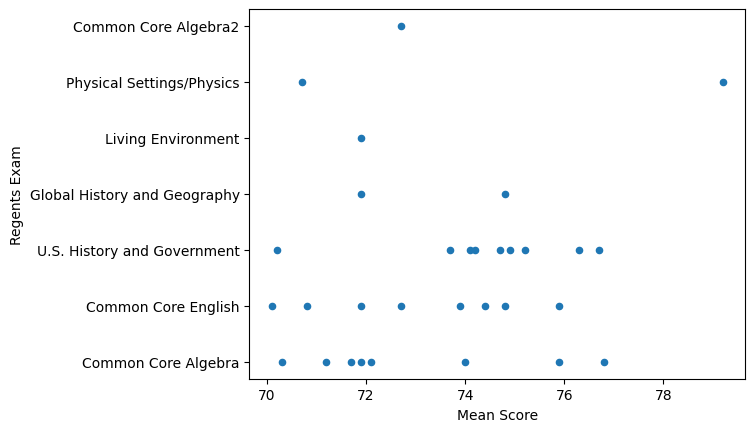

In [ ]:
#Lets do a visualization for Queens Collegiate's test scores
schools_qc_2017.plot.scatter(y='Regents Exam', x='Mean Score')

In [ ]:
#Let's compare the average test scores of Queens Collegiate with other schools
#First we check the list of unique scores
for school in schools['Mean Score'].unique():
    print(school)


79.5
79.7
82.0
78.7
85.0
72.8
84.2
85.7
83.2
80.8
89.0
80.5
77.2
75.2
71.7
87.7
79.8
71.1
71.0
80.3
71.9
86.5
70.4
76.7
73.4
78.3
81.6
83.3
87.4
76.3
85.8
83.9
87.3
90.7
78.4
70.7
75.9
75.4
72.2
78.2
76.2
83.7
74.7
84.4
72.7
77.4
73.3
70.8
74.8
72.0
82.2
77.7
76.4
71.6
77.6
82.7
78.0
73.6
71.5
78.5
70.3
73.1
73.5
74.6
86.7
72.3
72.1
76.0
74.2
77.1
81.2
73.7
72.9
74.5
72.4
72.6
83.8
74.3
73.9
70.9
70.5
75.1
80.4
73.2
75.8
76.8
74.0
76.1
74.9
84.6
76.5
71.2
81.3
75.5
87.6
84.9
76.6
81.0
70.1
70.2
71.8
81.5
73.8
83.5
78.8
78.6
92.2
81.9
87.2
88.0
88.5
75.3
86.8
79.4
79.1
88.6
75.6
77.0
83.1
92.8
86.9
91.9
87.8
83.6
93.9
84.7
84.3
80.6
79.9
74.1
75.7
76.9
80.9
82.5
84.1
88.4
91.1
79.3
89.8
89.7
82.4
73.0
77.3
74.4
79.6
81.8
71.4
87.1
90.1
89.3
79.2
77.9
71.3
77.8
78.9
78.1
82.1
85.1
81.7
81.1
91.0
77.5
85.5
80.1
80.7
81.4
82.6
75.0
88.1
90.0
90.2
83.4
70.6
72.5
89.6
89.5
85.9
89.1
79.0
85.2
89.2
87.9
82.8
85.3
84.5
89.9
86.6
86.2
82.9
85.4
84.0
89.4
83.0
82.3
80.2
87.5
92.6
86.3
88.8
87.0


In [ ]:
#This will require a little more cleaning. Which is something we didn't think about when we were first seaching through this data
schools = schools[schools['Mean Score'] != 's'].copy()
#Next let's restrict it to other secondary schools
schools = schools[schools['School Level'] == 'Secondary School']
#I will also restrict the data to 2017
schools = schools[schools['Year'].astype('str').str.contains('2017')]

In [ ]:
#Time to convert the Mean Score column from merely an object into a floating value
schools['Mean Score'] = schools['Mean Score'].astype(float)

In [ ]:
#Now we can see the average Regents test scores across all the schools
schools = schools[(schools['Mean Score'] > 70)]
schools.sort_values(by='Mean Score')

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
211721,84X482,Dr. Richard Izquierdo Health and Science Chart...,Secondary School,Physical Settings/Earth Science,2017,26,70.1,6,23.1,20,76.9,4,15.4,na,na
139559,84X488,The Equality Charter School,Secondary School,Physical Settings/Physics,2017,22,70.1,6,27.3,16,72.7,6,27.3,na,na
115115,10X342,International School for Liberal Arts,Secondary School,Physical Settings/Earth Science,2017,30,70.1,8,26.7,22,73.3,8,26.7,na,na
132201,28Q310,Queens Collegiate: A College Board School,Secondary School,Common Core English,2017,52,70.1,10,19.2,42,80.8,18,34.6,27,51.9
30423,09X568,Young Women's Leadership School of the Bronx,Secondary School,Living Environment,2017,91,70.1,27,29.7,64,70.3,18,19.8,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153226,05M362,Columbia Secondary School,Secondary School,U.S. History and Government,2017,8,94.3,0,0,8,100,7,87.5,na,na
203371,30Q580,Baccalaureate School for Global Education,Secondary School,Common Core English,2017,18,94.4,0,0,18,100,18,100,18,100
134703,30Q580,Baccalaureate School for Global Education,Secondary School,U.S. History and Government,2017,41,95.1,0,0,41,100,41,100,na,na
96501,30Q580,Baccalaureate School for Global Education,Secondary School,U.S. History and Government,2017,7,95.1,0,0,7,100,7,100,na,na


In [ ]:
#Let's put each school into their own data and find the average test score of each school. Including my own
schools_average = schools.groupby('School Name')['Mean Score'].mean()
pd.set_option('display.max_rows', None)
schools_average

,Mean Score
School Name,
Academy for College Preparation and Career Explora,71.350000
Academy for Young Writers,72.240000
Academy of Medical Technology: A College Board Sch,73.910000
All City Leadership Secondary School,79.240000
Antonia Pantoja Preparatory Academy: A College Boa,72.792857
"Archimedes Academy for Math, Science and Technolog",74.782353
Baccalaureate School for Global Education,88.278462
Bedford Stuyvesant Collegiate Charter School,79.893750
Bronx Early College Academy for Teaching & Learnin,73.970370


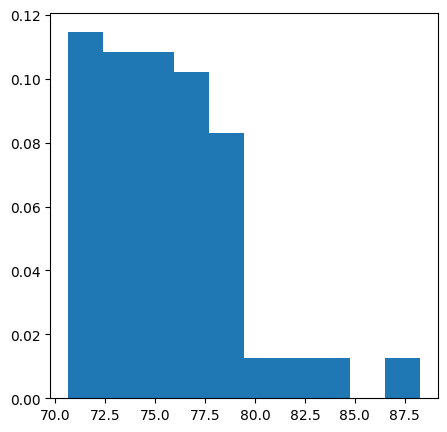

In [ ]:
#Lets visualize all of the schools test score averages
plt.figure(figsize=(5,5))
plt.hist(schools_average, density= True)
plt.show()

**Conclusion**

---

My alma matter and their test scores are admirable, but when compared to the test scores of varous schools around the area, it's not the most stellar. In the grand scheme of this data, my school is pretty average.